## Reported Findings:


 - no discernable patterns across analysis done, including:
     - correlation amongst columns
     - clustering
     - dimensionality reduction

Import List:

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## Raw Data Import and Converted-to-numbers Data

In [155]:
data = pd.read_csv("/Users/natelo/Downloads/XTern_AI_Data.csv")
print(data.head)


<bound method NDFrame.head of         Year                    Major                University  Time  \
0     Year 2                  Physics  Indiana State University    12   
1     Year 3                Chemistry     Ball State University    14   
2     Year 3                Chemistry         Butler University    12   
3     Year 2                  Biology  Indiana State University    11   
4     Year 3  Business Administration         Butler University    12   
...      ...                      ...                       ...   ...   
4995  Year 2              Mathematics     Ball State University    11   
4996  Year 3                Astronomy  Indiana State University    12   
4997  Year 3                Chemistry         Butler University    13   
4998  Year 3                Astronomy         Butler University    15   
4999  Year 2                Economics  University of Notre Dame    15   

                                                  Order  
0                                  

In [156]:
#Convert the raw data to numerical

converted_data = data.copy()

year_mapping = {'Year 1': 1, 'Year 2': 2, 'Year 3': 3, 'Year 4': 4}
unique_majors = data['Major'].unique()
unique_universities = data['University'].unique()
unique_orders = data['Order'].unique()

major_mapping = {value: index for index, value in enumerate(unique_majors)}
uni_mapping = {value: index for index, value in enumerate(unique_universities)}
order_mapping = {value: index for index, value in enumerate(unique_orders)}

converted_data['Year'] = data['Year'].map(year_mapping)
converted_data['Major'] = data['Major'].map(major_mapping)
converted_data['University'] = data['University'].map(uni_mapping)  
converted_data['Order'] = data['Order'].map(order_mapping)  
print(converted_data.head())


   Year  Major  University  Time  Order
0     2      0           0    12      0
1     3      1           1    14      1
2     3      1           2    12      2
3     2      2           0    11      0
4     3      3           2    12      3


## Model Prediction

In [157]:
X = converted_data[['Major', 'University', 'Year', 'Time']]  # Features
y = converted_data['Order']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)
lm_predictions = lm.predict(X_test)
lm_mse = mean_squared_error(y_test, lm_predictions)
print("Linear Regression MSE: ", lm_mse)
scores = cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [(-score) ** 0.5 for score in scores]

# Display cross-validation RMSE scores
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
r2 = r2_score(y_test, lm_predictions)
print("R^2: ", r2)

Linear Regression MSE:  8.347702711847669
Cross-Validation RMSE Scores: [2.828984103371013, 2.8072344310187183, 2.8101442920667017, 2.8129877799597964, 2.8320517508839815]
R^2:  0.03199766225746814


Descriptive data analysis, although it does not tell much about the data

In [158]:

category_statistics = converted_data.describe()
print(category_statistics)

for col in data.columns:
    print(f"Descriptive Statistics for {col}:\n{category_statistics[col]}\n")


              Year        Major  University         Time        Order
count  5000.000000  5000.000000  5000.00000  5000.000000  5000.000000
mean      2.544000     4.599400     1.56320    12.528200     4.487000
std       0.501313     3.516332     1.30872     1.357193     2.862913
min       1.000000     0.000000     0.00000     8.000000     0.000000
25%       2.000000     1.750000     0.00000    12.000000     2.000000
50%       3.000000     5.000000     2.00000    13.000000     4.000000
75%       3.000000     7.000000     2.00000    13.000000     7.000000
max       4.000000    19.000000     9.00000    17.000000     9.000000
Descriptive Statistics for Year:
count    5000.000000
mean        2.544000
std         0.501313
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Year, dtype: float64

Descriptive Statistics for Major:
count    5000.000000
mean        4.599400
std         3.516332
min         0.000000
25%         1.750000
50

## Visual Data Analysis - Correlation, visual spread, and more


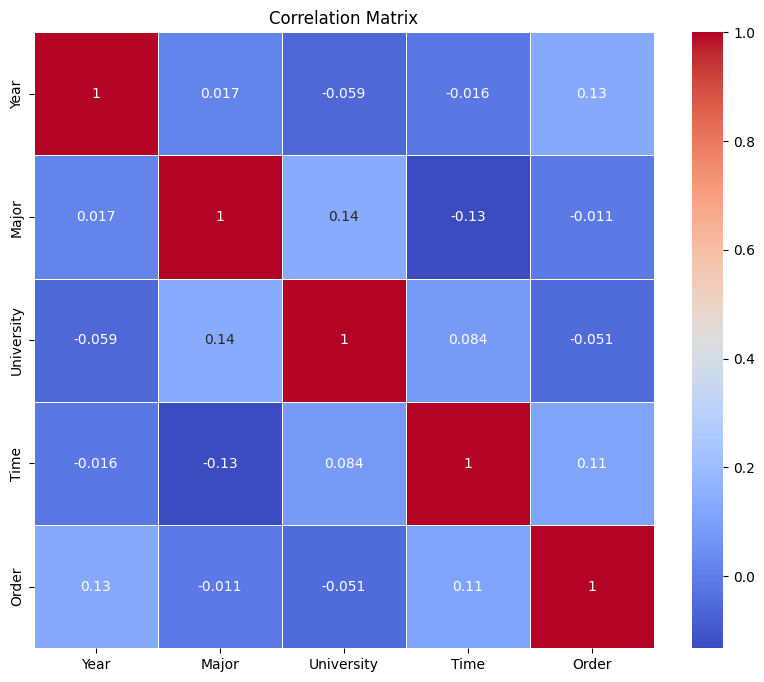

In [159]:
correlation_matrix = converted_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/Users/natelo/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


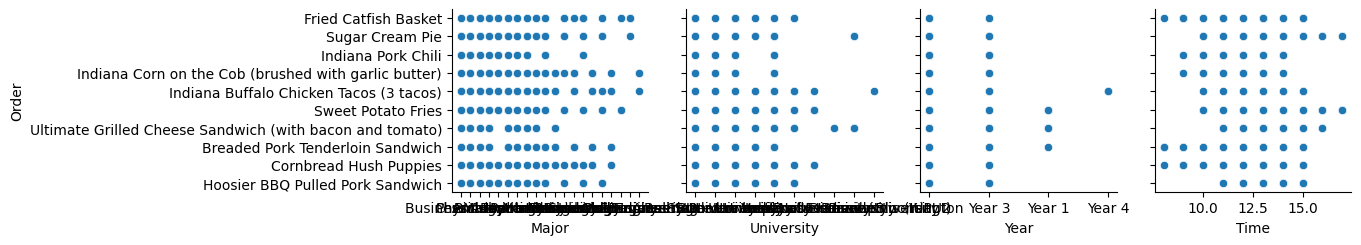

In [160]:
sns.pairplot(data, x_vars=['Major', 'University', 'Year', 'Time'], y_vars=['Order'], kind='scatter')
plt.show()

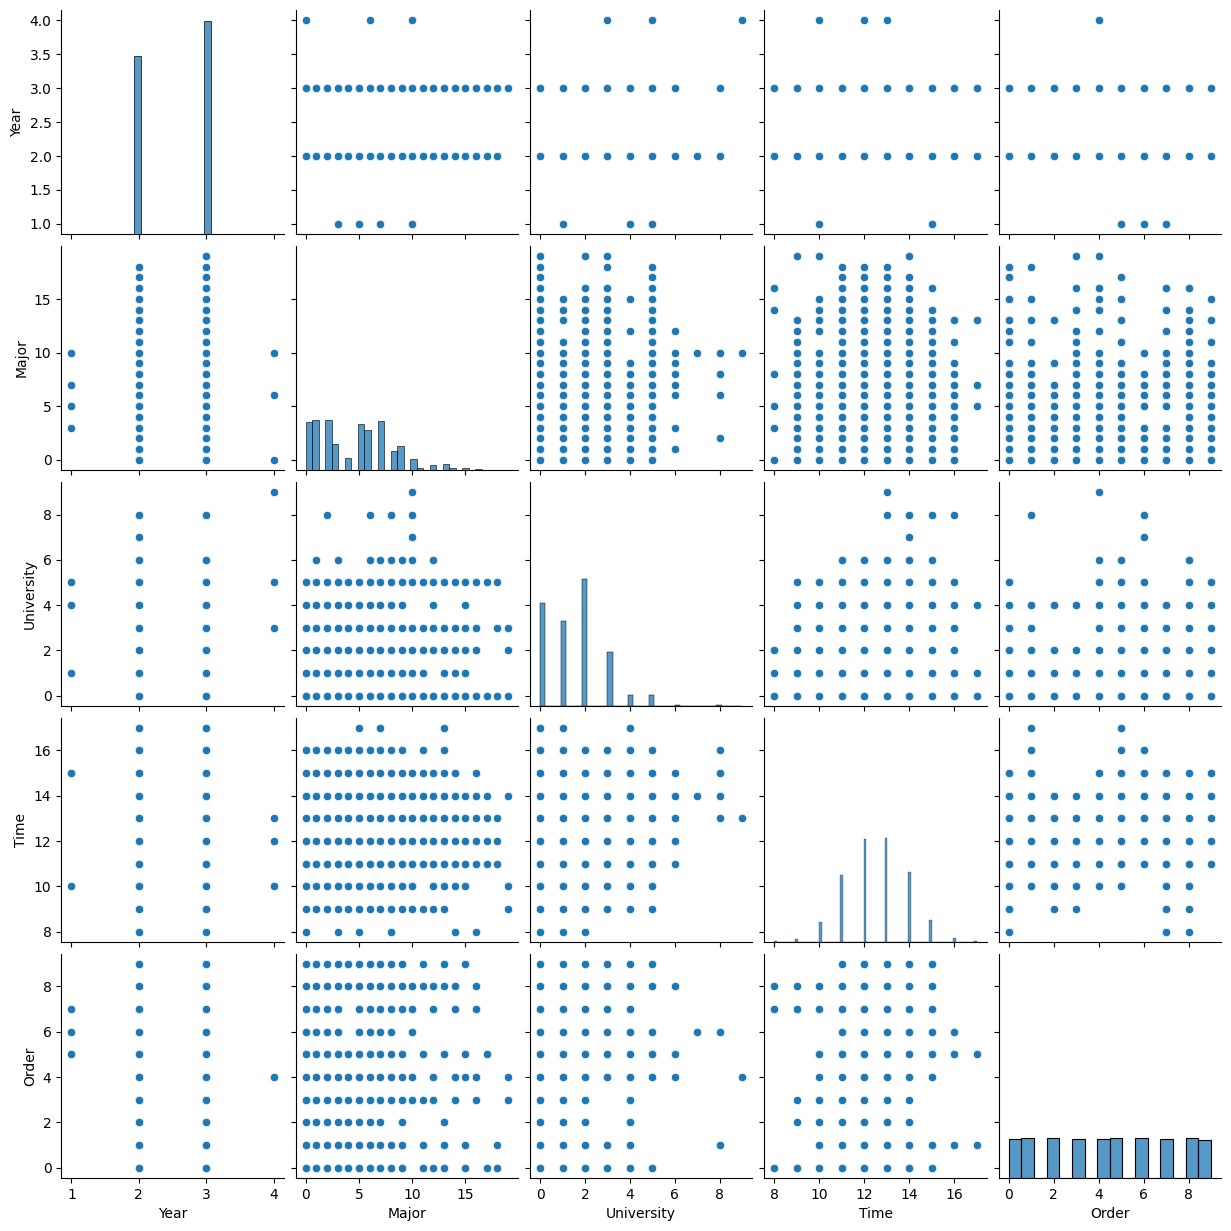

In [161]:
sns.pairplot(converted_data)
plt.show()

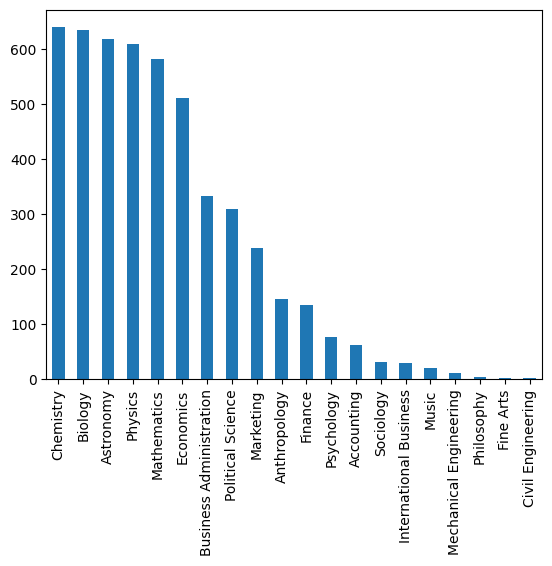

In [169]:
#All Majors surveyed
major_counts = data['Major'].value_counts()
major_bar = major_counts.plot(kind='bar')

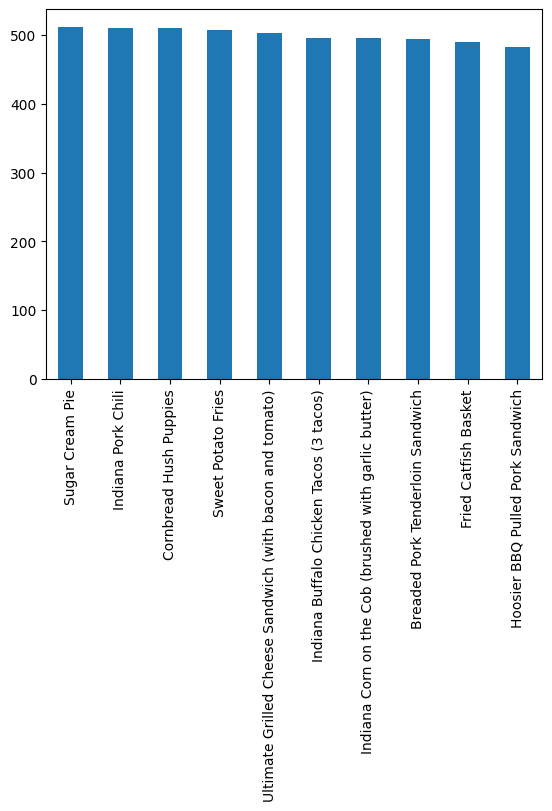

In [168]:
#Ordered food counts
food_counts = data['Order'].value_counts()
food_bar = food_counts.plot(kind='bar')

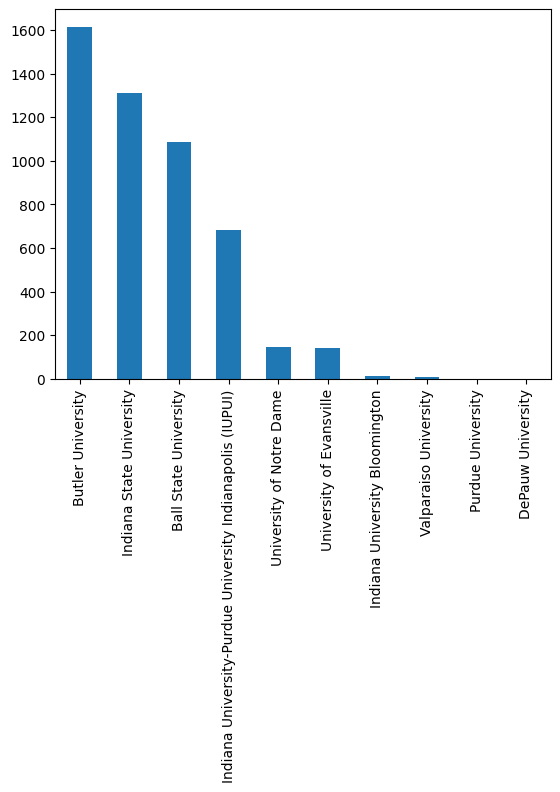

In [167]:
#University Spread
university_counts = data['University'].value_counts()
university_bar = university_counts.plot(kind='bar')

## Cluster Detection/Analysis via K-Means

/Users/natelo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/natelo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/natelo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/natelo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

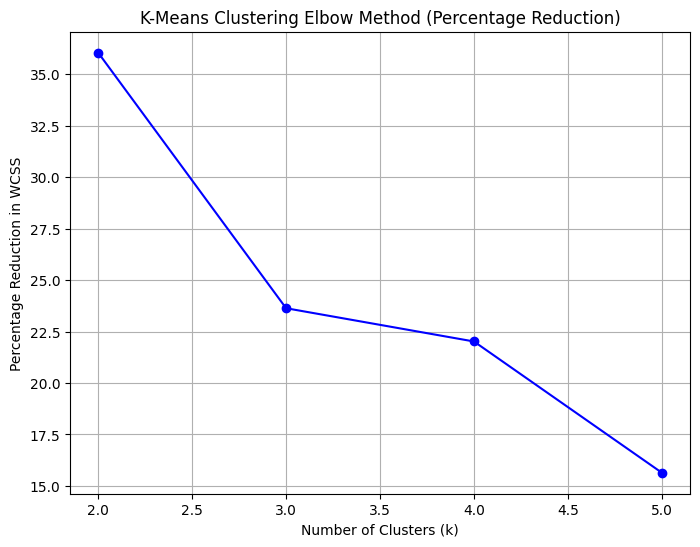

In [165]:
cluster_data = converted_data.copy()

k_values = range(1, 6)

percentage_reduction = []
prev_wcss = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    wcss = kmeans.inertia_
    
    if prev_wcss is not None:
        reduction_percent = (prev_wcss - wcss) / prev_wcss * 100
        percentage_reduction.append(reduction_percent)
    
    prev_wcss = wcss

# Plot the percentage reduction in WCSS for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values[1:], percentage_reduction, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Percentage Reduction in WCSS')
plt.title('K-Means Clustering Elbow Method (Percentage Reduction)')
plt.grid(True)
plt.show()

## Dimensionality Reduction via PCA Analysis

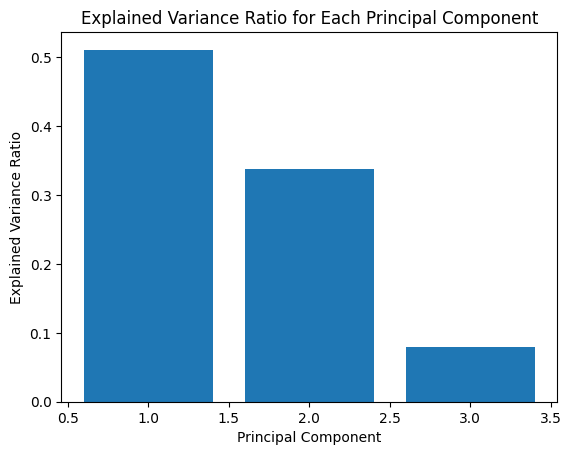

In [166]:
components = 3
pca = PCA(n_components=components)
principal_components = pca.fit_transform(converted_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])  # Adjust column names as needed

# Visualize the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()
